In [1]:
from fl.preprocessing import load_mnist, data_to_client
from fl.model import NN
from fl.model import NN, train_and_test
from fl.utils import plot_train_and_test, weights_to_json
from fl.federated_learning import federated

In [2]:
from google.colab import files
files.upload()

Saving base_fl.weights.h5 to base_fl.weights.h5


In [3]:
!mv base_fl.weights.h5 weights/

In [4]:
model_base = NN()
x_train, y_train, x_test, y_test = load_mnist()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
import numpy as np
y_train = np.full((10000, 10), True) # On change les valeurs des prédictions attendues

63/63 [==============================] - 1s 11ms/step
Accuracy of the model: 0.089


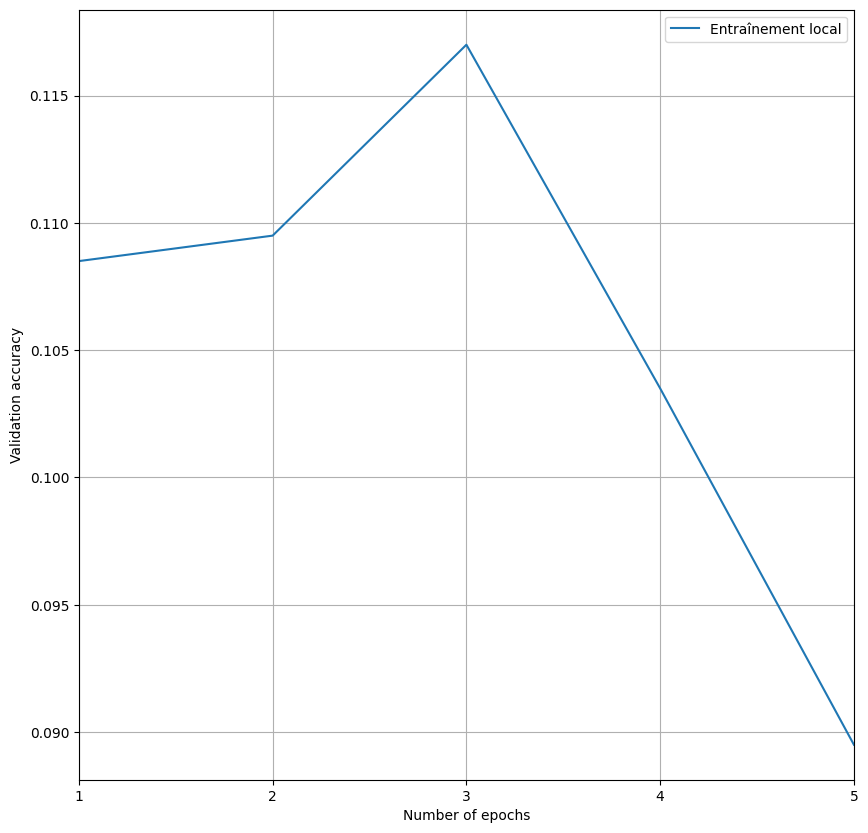

In [6]:
local_epochs = 5

local_results = train_and_test(
    model_base,
    x_train,
    y_train,
    x_test,
    y_test,
    epochs=local_epochs
)
plot_train_and_test([local_results["history"].history["val_accuracy"]], ["Entraînement local"], epochs=local_epochs)
# Le modèle est devenu nul, once again !

In [7]:
import requests as rq

URL = "https://du-poison.challenges.404ctf.fr"
rq.get(URL + "/healthcheck").json()

{'message': 'Statut : en pleine forme !'}

In [8]:
d = weights_to_json(local_results["weights"])
rq.post(URL + "/challenges/2", json=d).json()

{'message': 'Bravo ! Voici le drapeau : 404CTF{p3rF0rm4nc3_Ou_s3cUR1T3_FaUt_iL_Ch01s1r?}'}